# **Data Cleaning**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\ajv10\\Documents\\vscode-projects\\PP5\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ajv10\\Documents\\vscode-projects\\PP5'

---

## Load Data

In [4]:
import pandas as pd

df = pd.read_csv("outputs/datasets/collection/phnx_2015_2025.csv")
df.head(3)

,date,open,high,low,close,volume,dividends,stock splits
0,2015-01-02 00:00:00+00:00,629.093225,630.999564,621.269605,624.899231,385199,0.0,0.0
1,2015-01-05 00:00:00+00:00,624.517926,628.330604,611.204044,612.317383,416491,0.0,0.0
2,2015-01-06 00:00:00+00:00,616.130008,616.130008,597.447815,597.447815,781658,0.0,0.0


# Section 1

In [5]:
df = df.copy()
print(df.shape)
df

(2526, 8)


,date,open,high,low,close,volume,dividends,stock splits
0,2015-01-02 00:00:00+00:00,629.093225,630.999564,621.269605,624.899231,385199,0.0,0.0
1,2015-01-05 00:00:00+00:00,624.517926,628.330604,611.204044,612.317383,416491,0.0,0.0
2,2015-01-06 00:00:00+00:00,616.130008,616.130008,597.447815,597.447815,781658,0.0,0.0
3,2015-01-07 00:00:00+00:00,603.548219,605.812932,598.286709,604.310791,743617,0.0,0.0
4,2015-01-08 00:00:00+00:00,607.742163,612.317413,605.454508,611.936157,453541,0.0,0.0
...,...,...,...,...,...,...,...,...
2521,2024-12-23 00:00:00+00:00,498.162306,502.260357,496.762980,501.260834,1071229,0.0,0.0
2522,2024-12-24 00:00:00+00:00,502.260351,505.258920,501.760590,501.760590,436491,0.0,0.0
2523,2024-12-27 00:00:00+00:00,500.261324,503.759655,500.261324,502.760132,881757,0.0,0.0
2524,2024-12-30 00:00:00+00:00,501.760601,504.759170,498.961948,500.761078,608408,0.0,0.0


Section 1 content

## Data Exploration

In [6]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

[]

In [7]:
from ydata_profiling import ProfileReport
if vars_with_missing_data:
    profile = ProfileReport(df=df[vars_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")

There are no variables with missing data


<Axes: xlabel='date'>

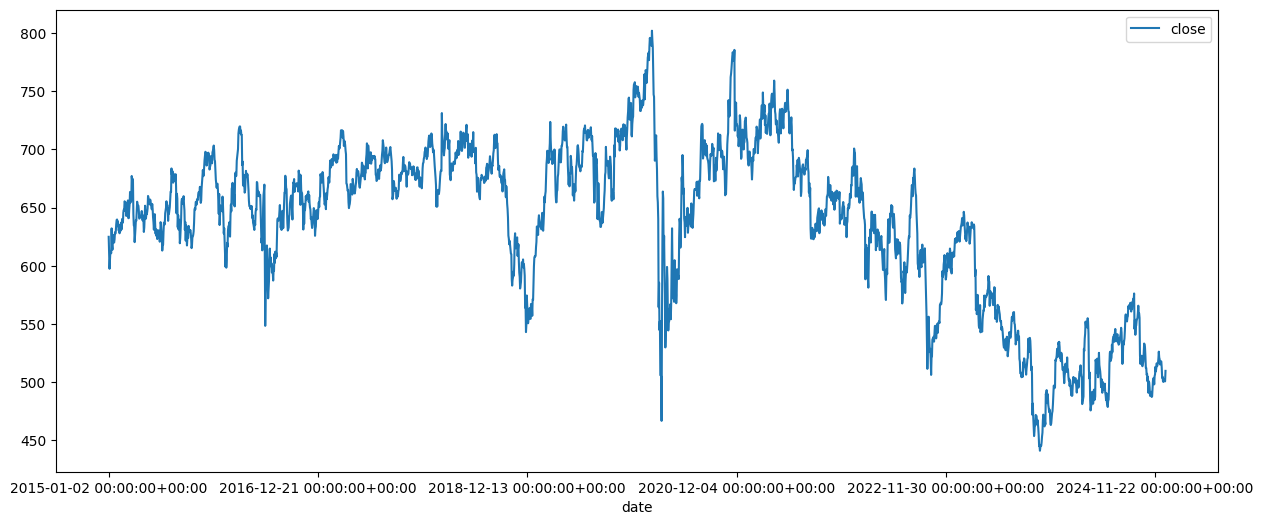

In [8]:
df.plot.line(y='close',x='date',figsize=(15, 6))

## Correlation and PPS Analysis

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman", numeric_only=True)
    df_corr_pearson = df.corr(method="pearson", numeric_only=True)

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [10]:

df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%  75%    max
ppscore   56.0  0.188  0.364  0.0  0.0  0.0  0.0  0.897


---

# Section 2

Section 2 content

In [11]:
df = df.drop(['dividends','stock splits'],axis=1)

In [12]:
df['pre_open'] = df['open'].shift(+1)
df['pre_high'] = df['high'].shift(+1)
df['pre_low'] = df['low'].shift(+1)
df['pre_close'] = df['close'].shift(+1)
df['pre_vol'] = df['volume'].shift(+1)
df['pre_open_2'] = df['open'].shift(+2)
df['pre_high_2'] = df['high'].shift(+2)
df['pre_low_2'] = df['low'].shift(+2)
df['pre_close_2'] = df['close'].shift(+2)
df['pre_vol_2'] = df['volume'].shift(+2)
print(df.shape)
df

(2526, 16)


,date,open,high,low,close,volume,pre_open,pre_high,pre_low,pre_close,pre_vol,pre_open_2,pre_high_2,pre_low_2,pre_close_2,pre_vol_2
0,2015-01-02 00:00:00+00:00,629.093225,630.999564,621.269605,624.899231,385199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05 00:00:00+00:00,624.517926,628.330604,611.204044,612.317383,416491,629.093225,630.999564,621.269605,624.899231,385199.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-06 00:00:00+00:00,616.130008,616.130008,597.447815,597.447815,781658,624.517926,628.330604,611.204044,612.317383,416491.0,629.093225,630.999564,621.269605,624.899231,385199.0
3,2015-01-07 00:00:00+00:00,603.548219,605.812932,598.286709,604.310791,743617,616.130008,616.130008,597.447815,597.447815,781658.0,624.517926,628.330604,611.204044,612.317383,416491.0
4,2015-01-08 00:00:00+00:00,607.742163,612.317413,605.454508,611.936157,453541,603.548219,605.812932,598.286709,604.310791,743617.0,616.130008,616.130008,597.447815,597.447815,781658.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,2024-12-23 00:00:00+00:00,498.162306,502.260357,496.762980,501.260834,1071229,499.761560,502.260368,492.964815,500.261322,3415182.0,501.260839,501.760601,497.162789,500.761078,1667456.0
2522,2024-12-24 00:00:00+00:00,502.260351,505.258920,501.760590,501.760590,436491,498.162306,502.260357,496.762980,501.260834,1071229.0,499.761560,502.260368,492.964815,500.261322,3415182.0
2523,2024-12-27 00:00:00+00:00,500.261324,503.759655,500.261324,502.760132,881757,502.260351,505.258920,501.760590,501.760590,436491.0,498.162306,502.260357,496.762980,501.260834,1071229.0
2524,2024-12-30 00:00:00+00:00,501.760601,504.759170,498.961948,500.761078,608408,500.261324,503.759655,500.261324,502.760132,881757.0,502.260351,505.258920,501.760590,501.760590,436491.0


In [13]:
df['average'] = df[['open', 'close']].mean(axis=1)

In [14]:
df['tomorrows average'] = df[['open', 'close']].mean(axis=1).shift(-1)

In [15]:
df['target'] = (df['tomorrows average'] > df['average']).astype(int)
df = df.drop(['tomorrows average'],axis=1)
print(df.shape)
df

(2526, 18)


,date,open,high,low,close,volume,pre_open,pre_high,pre_low,pre_close,pre_vol,pre_open_2,pre_high_2,pre_low_2,pre_close_2,pre_vol_2,average,target
0,2015-01-02 00:00:00+00:00,629.093225,630.999564,621.269605,624.899231,385199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,626.996228,0
1,2015-01-05 00:00:00+00:00,624.517926,628.330604,611.204044,612.317383,416491,629.093225,630.999564,621.269605,624.899231,385199.0,NaN,NaN,NaN,NaN,NaN,618.417655,0
2,2015-01-06 00:00:00+00:00,616.130008,616.130008,597.447815,597.447815,781658,624.517926,628.330604,611.204044,612.317383,416491.0,629.093225,630.999564,621.269605,624.899231,385199.0,606.788911,0
3,2015-01-07 00:00:00+00:00,603.548219,605.812932,598.286709,604.310791,743617,616.130008,616.130008,597.447815,597.447815,781658.0,624.517926,628.330604,611.204044,612.317383,416491.0,603.929505,1
4,2015-01-08 00:00:00+00:00,607.742163,612.317413,605.454508,611.936157,453541,603.548219,605.812932,598.286709,604.310791,743617.0,616.130008,616.130008,597.447815,597.447815,781658.0,609.839160,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,2024-12-23 00:00:00+00:00,498.162306,502.260357,496.762980,501.260834,1071229,499.761560,502.260368,492.964815,500.261322,3415182.0,501.260839,501.760601,497.162789,500.761078,1667456.0,499.711570,1
2522,2024-12-24 00:00:00+00:00,502.260351,505.258920,501.760590,501.760590,436491,498.162306,502.260357,496.762980,501.260834,1071229.0,499.761560,502.260368,492.964815,500.261322,3415182.0,502.010470,0
2523,2024-12-27 00:00:00+00:00,500.261324,503.759655,500.261324,502.760132,881757,502.260351,505.258920,501.760590,501.760590,436491.0,498.162306,502.260357,496.762980,501.260834,1071229.0,501.510728,0
2524,2024-12-30 00:00:00+00:00,501.760601,504.759170,498.961948,500.761078,608408,500.261324,503.759655,500.261324,502.760132,881757.0,502.260351,505.258920,501.760590,501.760590,436491.0,501.260839,1


In [16]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count  mean    std  min  25%    50%    75%    max
ppscore  306.0  0.42  0.415  0.0  0.0  0.714  0.831  0.924




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



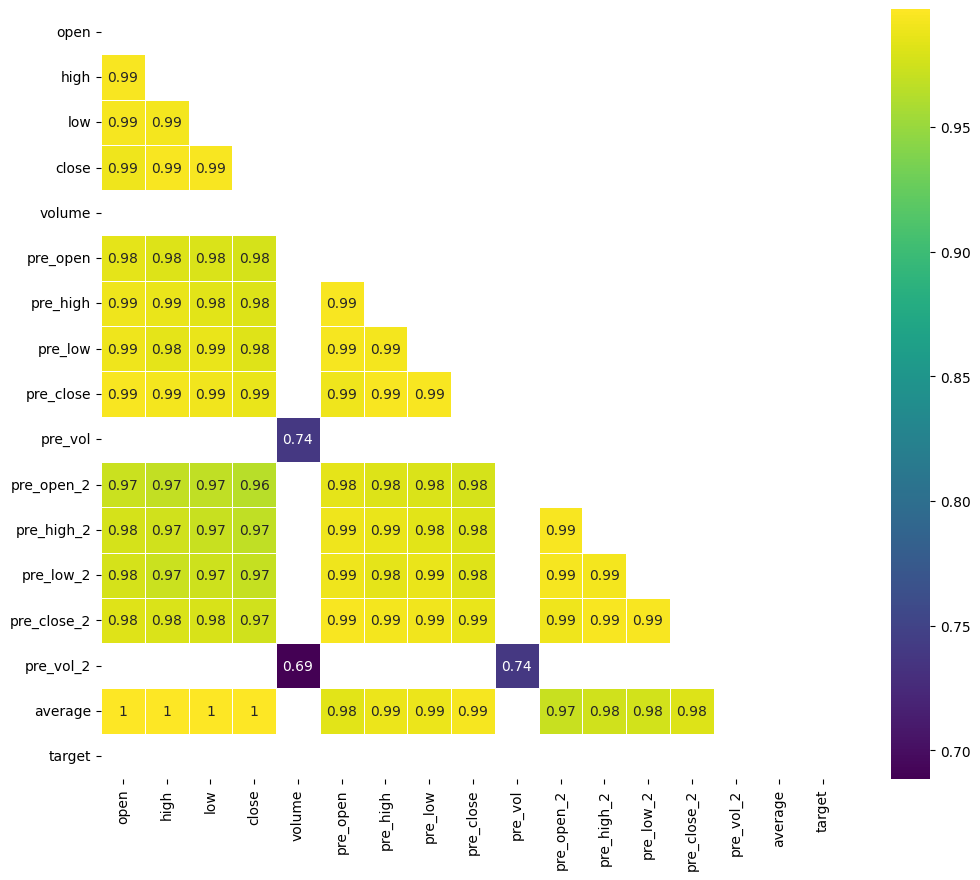



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



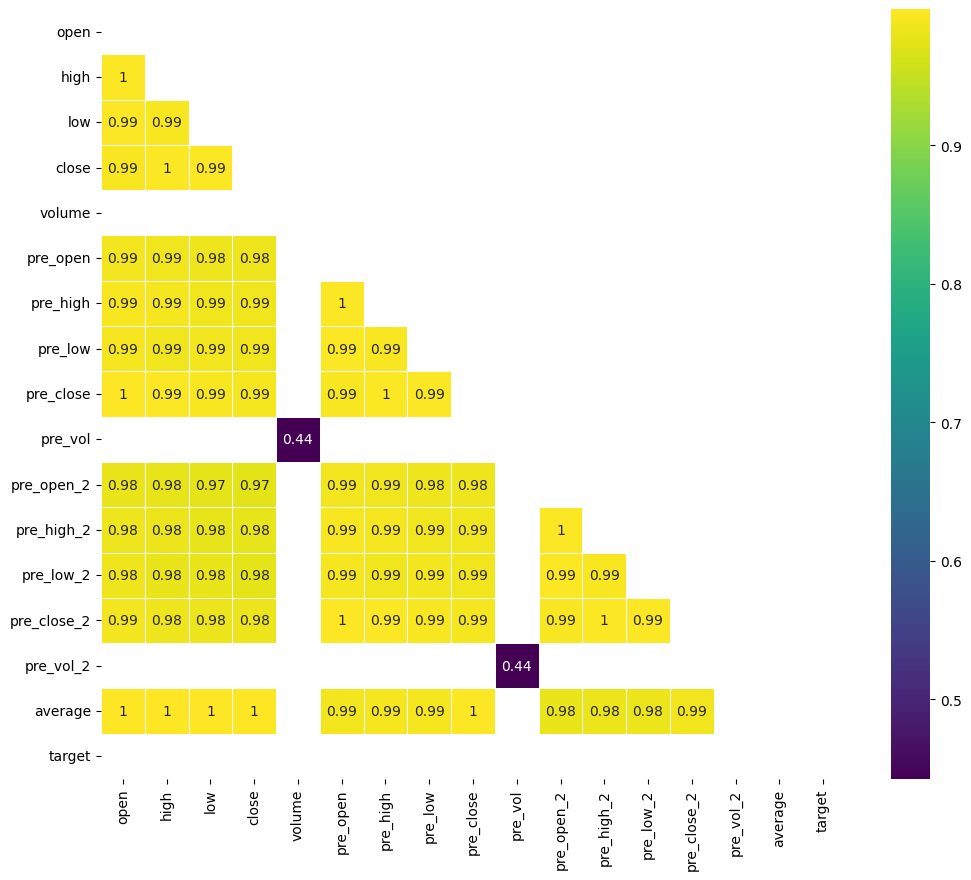



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



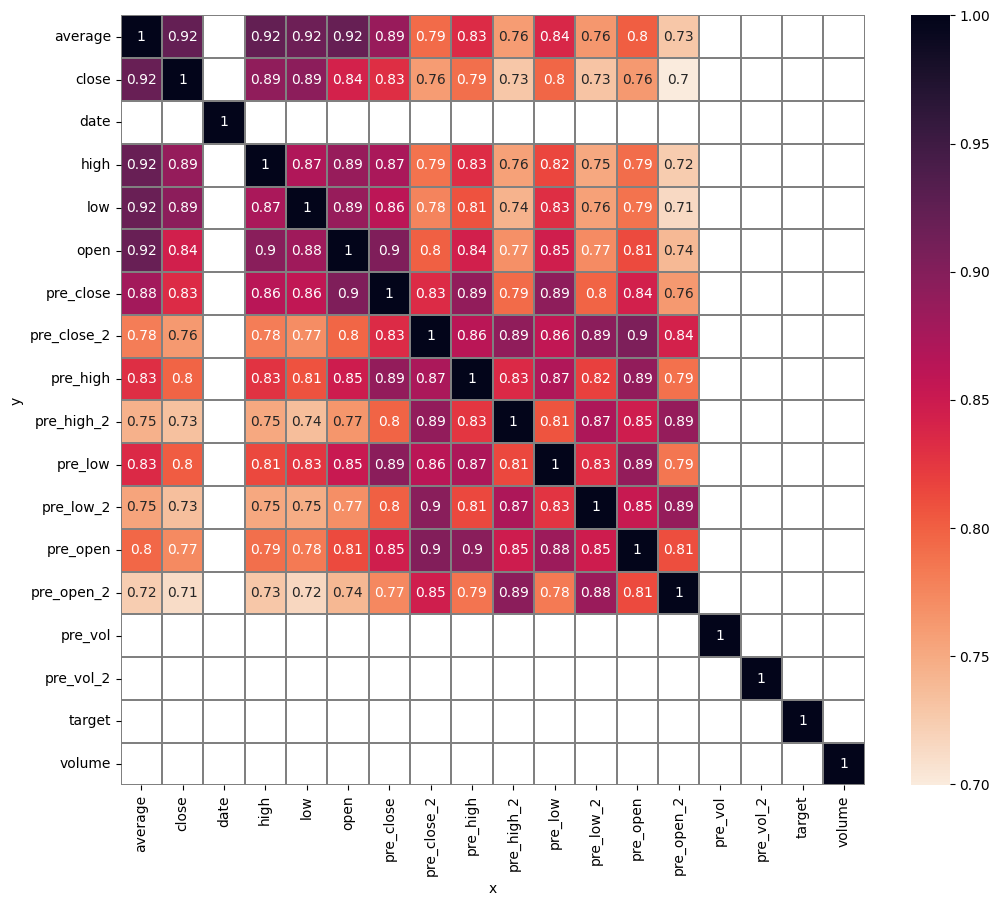

In [17]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

## Assessing Missing Data Levels

In [18]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data

In [19]:

EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType
pre_open_2,2,0.08,float64
pre_vol_2,2,0.08,float64
pre_close_2,2,0.08,float64
pre_low_2,2,0.08,float64
pre_high_2,2,0.08,float64
pre_close,1,0.04,float64
pre_open,1,0.04,float64
pre_high,1,0.04,float64
pre_low,1,0.04,float64
pre_vol,1,0.04,float64


In [20]:
df = df.dropna()
print(df.shape)
df

(2524, 18)


,date,open,high,low,close,volume,pre_open,pre_high,pre_low,pre_close,pre_vol,pre_open_2,pre_high_2,pre_low_2,pre_close_2,pre_vol_2,average,target
2,2015-01-06 00:00:00+00:00,616.130008,616.130008,597.447815,597.447815,781658,624.517926,628.330604,611.204044,612.317383,416491.0,629.093225,630.999564,621.269605,624.899231,385199.0,606.788911,0
3,2015-01-07 00:00:00+00:00,603.548219,605.812932,598.286709,604.310791,743617,616.130008,616.130008,597.447815,597.447815,781658.0,624.517926,628.330604,611.204044,612.317383,416491.0,603.929505,1
4,2015-01-08 00:00:00+00:00,607.742163,612.317413,605.454508,611.936157,453541,603.548219,605.812932,598.286709,604.310791,743617.0,616.130008,616.130008,597.447815,597.447815,781658.0,609.839160,1
5,2015-01-09 00:00:00+00:00,611.173555,616.511255,608.123389,612.317383,404476,607.742163,612.317413,605.454508,611.936157,453541.0,603.548219,605.812932,598.286709,604.310791,743617.0,611.745469,1
6,2015-01-12 00:00:00+00:00,616.129997,617.655080,607.742131,610.792297,361651,611.173555,616.511255,608.123389,612.317383,404476.0,607.742163,612.317413,605.454508,611.936157,453541.0,613.461147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,2024-12-23 00:00:00+00:00,498.162306,502.260357,496.762980,501.260834,1071229,499.761560,502.260368,492.964815,500.261322,3415182.0,501.260839,501.760601,497.162789,500.761078,1667456.0,499.711570,1
2522,2024-12-24 00:00:00+00:00,502.260351,505.258920,501.760590,501.760590,436491,498.162306,502.260357,496.762980,501.260834,1071229.0,499.761560,502.260368,492.964815,500.261322,3415182.0,502.010470,0
2523,2024-12-27 00:00:00+00:00,500.261324,503.759655,500.261324,502.760132,881757,502.260351,505.258920,501.760590,501.760590,436491.0,498.162306,502.260357,496.762980,501.260834,1071229.0,501.510728,0
2524,2024-12-30 00:00:00+00:00,501.760601,504.759170,498.961948,500.761078,608408,500.261324,503.759655,500.261324,502.760132,881757.0,502.260351,505.258920,501.760590,501.760590,436491.0,501.260839,1


In [21]:
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType


(2524, 18)


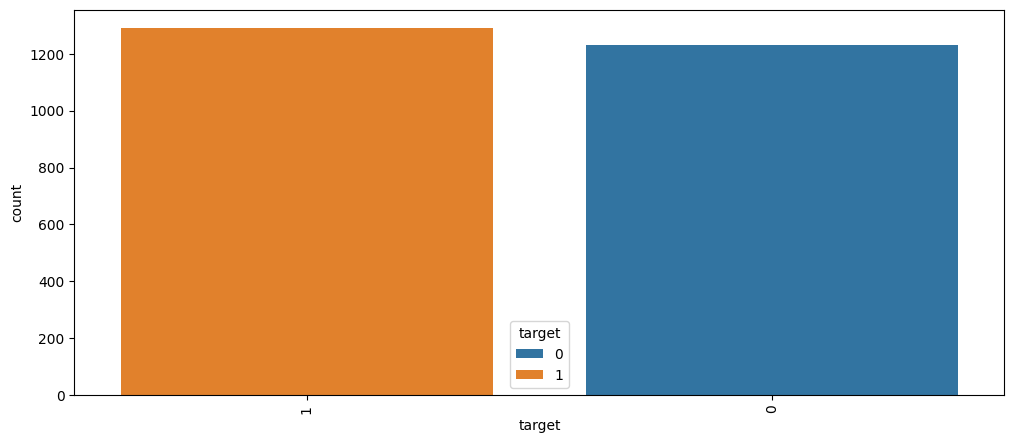

In [22]:
print(df.shape)
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='target', hue='target', order=df['target'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# Section 3

## Split Train and Test Set

In [23]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['target'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (2019, 18) 
TestSet shape: (505, 18)


In [24]:
df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 0 variables with missing data 



,RowsWithMissingData,PercentageOfDataset,DataType


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [25]:
try:
  # create here your folder
  os.makedirs(name='outputs/datasets/cleaned')
  print("folder created")
except Exception as e:
  print(e)

folder created


## Cleaned Data

In [26]:
df.to_csv("outputs/datasets/cleaned/phnx_2015_2025.csv", index=False)
print("file saved")

file saved


## Train Set

In [27]:
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)
print("file saved")

file saved


## Test Set

In [28]:
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)
print("file saved")

file saved
